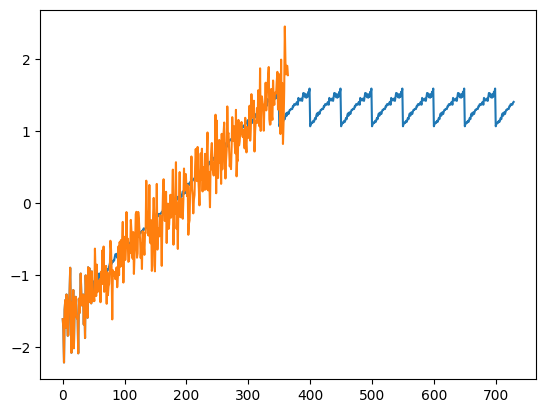

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from utils import MyLSTM

in_window, out_window = 50, 50
model = MyLSTM(input_size=1, out_size=out_window, hidden_size=out_window)
model.load_state_dict(torch.load('./ckpt/model.pt'))
original_data = np.load('data/time_series_data.npy')
time_series_data = np.zeros(365*2, dtype=np.float32)
time_series_data[:in_window] = original_data[:in_window]

model.eval()
for index in range(in_window, 365*2, out_window):
    data = torch.tensor(time_series_data[index-in_window: index]).to(torch.float64).view(1, -1, 1)
    data += torch.randn_like(data) * 0.01
    with torch.no_grad():
        predicted = model(data)
        if index + out_window > 365*2:
            time_series_data[index:] = predicted[0].numpy()[:365*2-index]
        else:
            time_series_data[index : index + out_window] = predicted[0].numpy()
plt.plot(time_series_data)
plt.plot(original_data)   